In [1]:
#ce code permet de connecter  collab a google drive
from google.colab import drive                  
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [27]:
IMAGE_SIZE = [150, 150] 

epochs = 10
batch_size = 100

train_path = '/content/drive/My Drive/Output train_Uni'
test_path = '/content/drive/My Drive/Output test_Uni'

image_files_train = glob(train_path + '/*/*.jp*g')
image_files_test = glob(test_path + '/*/*.jp*g')


folders = glob(train_path + '/*')

print(len(image_files_train))
print(len(image_files_test))

3102
1308


In [28]:
vgg=VGG19(include_top=False,weights='imagenet',input_shape=(150,150,3))
for layer in vgg.layers:
    layer.trainable =False
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [29]:
import keras
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='categorical_crossentropy',metrics='accuracy')

In [30]:
gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,preprocessing_function=preprocess_input)

In [31]:
test_gen=gen.flow_from_directory(test_path,target_size=IMAGE_SIZE)

Found 1309 images belonging to 15 classes.


In [32]:
labels = [None] * len(test_gen.class_indices)
print(labels)
for k, v in test_gen.class_indices.items():
  labels[v] = k
print(labels[0])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Captain Falcon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 151.061
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


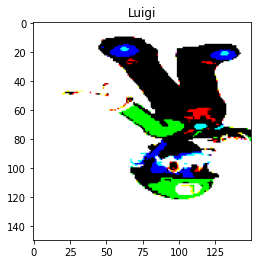

In [33]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  print(y[0])
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [34]:
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  test_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 3142 images belonging to 15 classes.
Found 1309 images belonging to 15 classes.


In [35]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files_train) // batch_size,
  validation_steps=len(image_files_test) // batch_size,
)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/31 [==============================] - 1950s 63s/step - loss: 10.0515 - accuracy: 0.4934 - val_loss: 7.3558 - val_accuracy: 0.6400
Epoch 2/10
31/31 [==============================] - 134s 4s/step - loss: 4.2620 - accuracy: 0.7367 - val_loss: 6.7935 - val_accuracy: 0.6792
Epoch 3/10
31/31 [==============================] - 123s 4s/step - loss: 3.4776 - accuracy: 0.7873 - val_loss: 6.3023 - val_accuracy: 0.7223
Epoch 4/10
31/31 [==============================] - 119s 4s/step - loss: 2.6571 - accuracy: 0.8225 - val_loss: 6.3607 - val_accuracy: 0.7146
Epoch 5/10
31/31 [==============================] - 119s 4s/step - loss: 2.5135 - accuracy: 0.8379 - val_loss: 6.2724 - val_accuracy: 0.7362
Epoch 6/10
31/31 [==============================] - 119s 4s/step - loss: 2.0437 - accuracy: 0.8626 - val_loss: 6.3734 - val_accuracy: 0.7354
Epoch 7/10
31/31 [==============================] - 118s 4s/step - loss: 2.0261 - accuracy: 0.8695 - val_loss: 6.9360 - val_accuracy: 0.7385
Epoch 8/10
31/31 [===

In [36]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
pred=model.predict_generator(valid_generator,
steps=STEP_SIZE_TEST,
verbose=1)
predicted_class_indices_test=np.argmax(pred,axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.
 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 40s 3s/step


In [37]:
STEP_SIZE_Train=train_generator.n//train_generator.batch_size
train_generator.reset()
pred2=model.predict_generator(train_generator,
steps=STEP_SIZE_Train,
verbose=1)
predicted_class_indices_train=np.argmax(pred2,axis=1)

 3/31 [=>............................] - ETA: 55s

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/31 [==============================] - 83s 3s/step


In [38]:
def get_confusion_matrix(data_path, N):
  
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [39]:
print(train_generator.class_indices) # pour le train
print(valid_generator.class_indices) # pour le test

{'Captain Falcon': 0, 'Daisy': 1, 'Donkey Kong': 2, 'Fox': 3, 'Harmonie': 4, 'Link': 5, 'Luigi': 6, 'Mario': 7, 'Phoenix Wright': 8, 'Pikachu': 9, 'Professor Layton': 10, 'Tiny Kong': 11, 'Toad': 12, 'Waluigi': 13, 'Yoshi': 14}
{'Captain Falcon': 0, 'Daisy': 1, 'Donkey Kong': 2, 'Fox': 3, 'Harmonie': 4, 'Link': 5, 'Luigi': 6, 'Mario': 7, 'Phoenix Wright': 8, 'Pikachu': 9, 'Professor Layton': 10, 'Tiny Kong': 11, 'Toad': 12, 'Waluigi': 13, 'Yoshi': 14}


Generating confusion matrix 3102
Found 3142 images belonging to 15 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Matrice de confusion pour le train


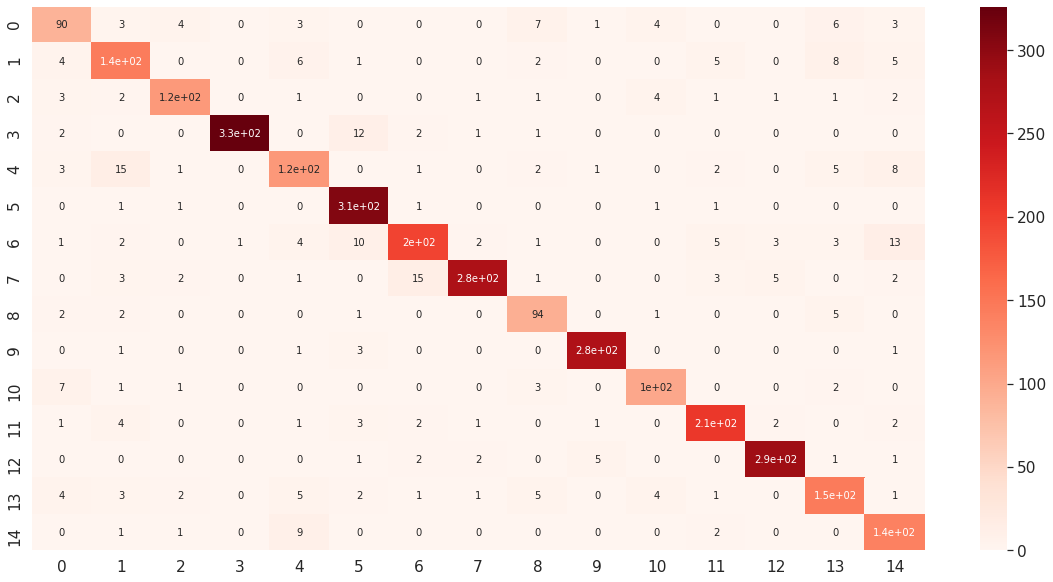

In [40]:
import seaborn as sns
import numpy as np
train_cm = get_confusion_matrix(train_path, len(image_files_train))
#print(train_cm)
print('Matrice de confusion pour le train')
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.heatmap(train_cm, annot=True, annot_kws={"size": 10}, cmap='Reds')

Generating confusion matrix 1308
Found 1309 images belonging to 15 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Matrice de confusion pour le test


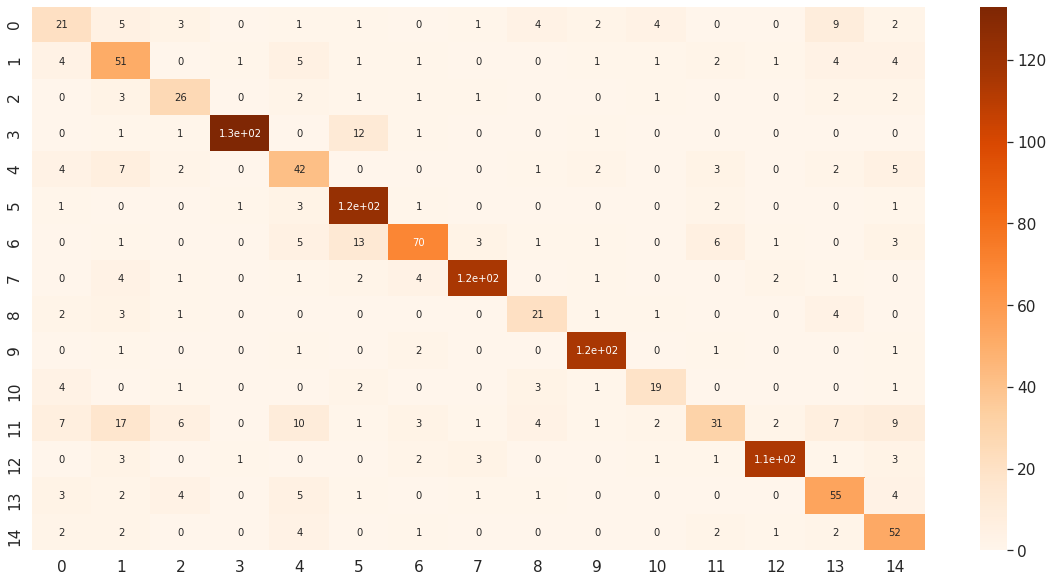

In [41]:
test_cm = get_confusion_matrix(test_path, len(image_files_test))
#print(test_cm)
print('Matrice de confusion pour le test')
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.heatmap(test_cm, annot=True, annot_kws={"size": 10}, cmap='Oranges')

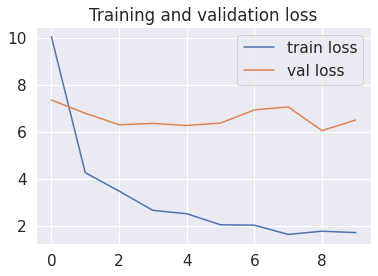

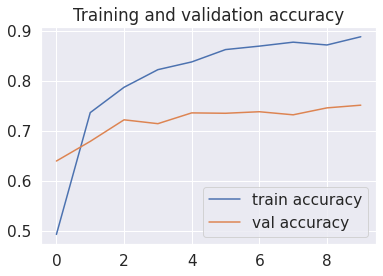

In [42]:
#print(r.history)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [43]:
score_train = model.evaluate_generator(train_generator, len(image_files_train) // batch_size)
print(f'Train results - Loss: {score_train[0]} - Accuracy: {score_train[1]}')
score_test = model.evaluate_generator(valid_generator, len(image_files_test) // batch_size)
print(f'Test results - Loss: {score_test[0]} - Accuracy: {score_test[1]}')

Instructions for updating:
Please use Model.evaluate, which supports generators.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train results - Loss: 1.3705761432647705 - Accuracy: 0.9041935205459595
Test results - Loss: 6.641763687133789 - Accuracy: 0.739230751991272
